# machine_learning_examples 

### steps
1. missing data
2. feature engineering (feature selection?, dimensionality reduction?)
3. model training (hyperparam tuning - over fitting?? cross validation, model selection)
4. accuracy metrics (roc, auc, tpr, fpr, r^2)


### import data and imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn import metrics

In [2]:
raw_train = pd.read_csv('./titanic 2/train.csv')
raw_test = pd.read_csv('./titanic 2/test.csv')

In [3]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### have a look

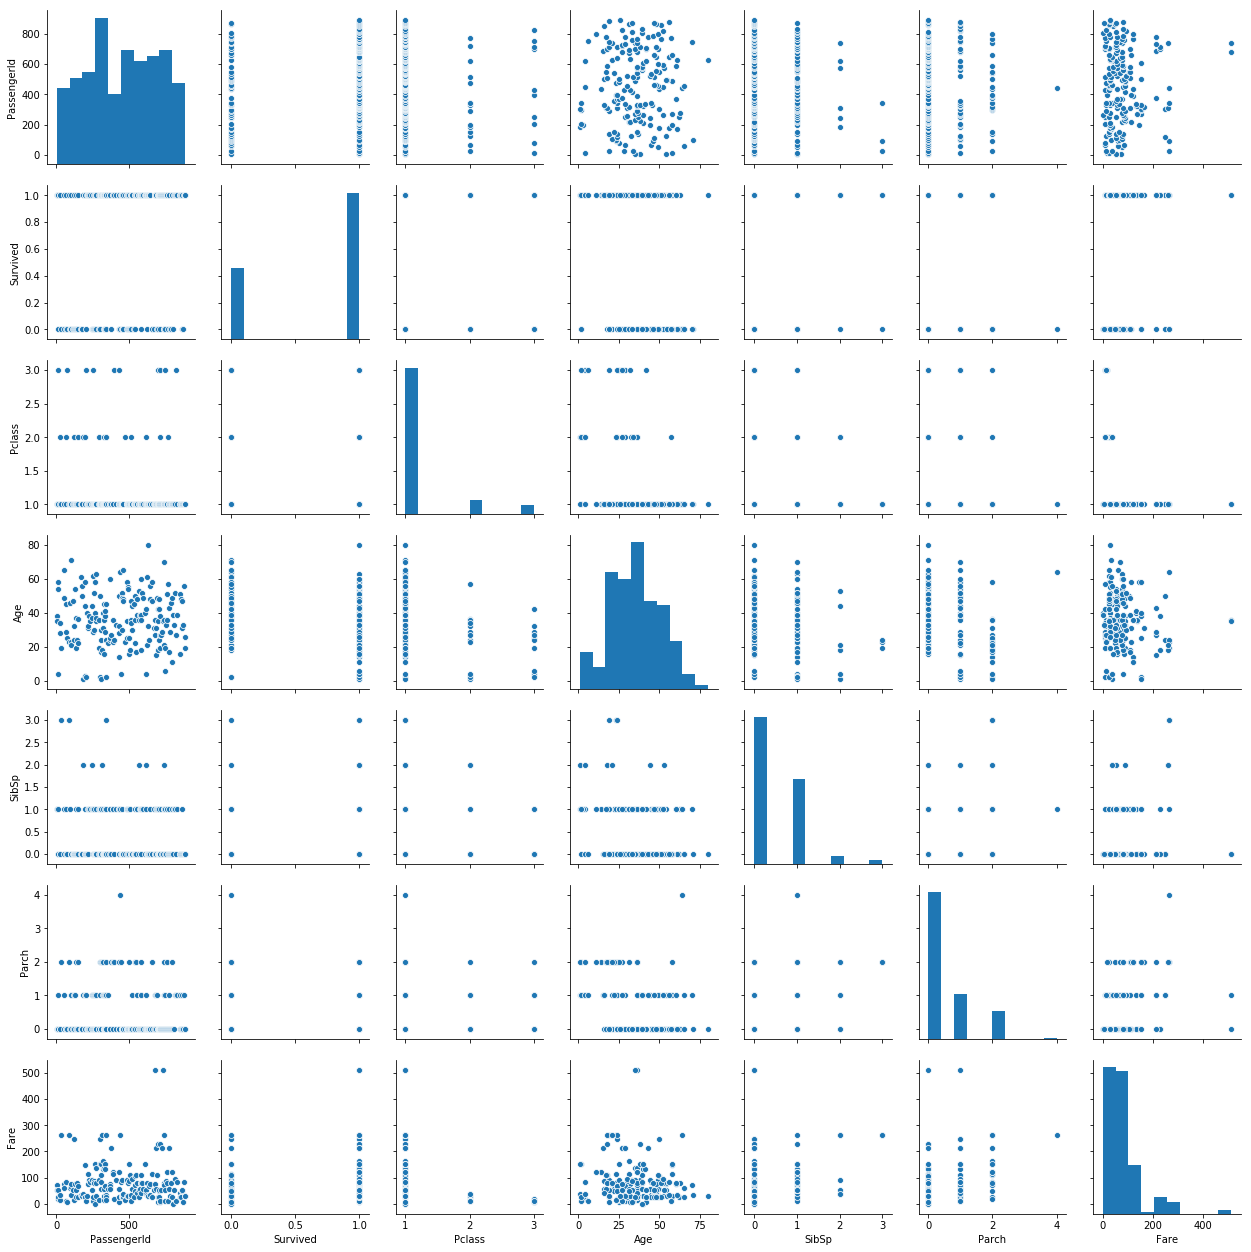

In [4]:
sns.pairplot(raw_train.dropna(), 
             #x_vars=['Pclass','Age'],y_vars=['Survived']
            )

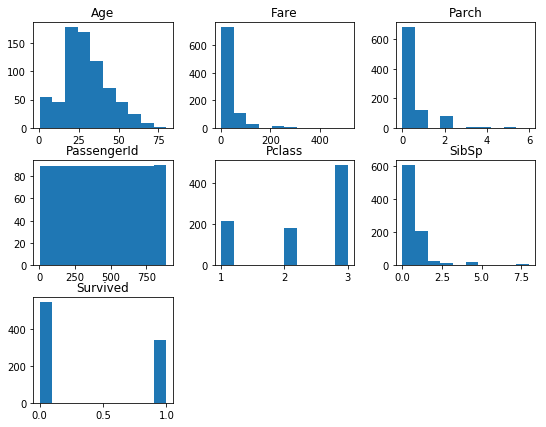

In [5]:
raw_train.hist(bins=10,figsize=(9,7),grid=False);

In [6]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
raw_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carbines, Mr. William",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [9]:
# look at relationship with targeet
raw_train[["Parch", "Survived"]]\
    .groupby(['Parch'], as_index=False)\
    .mean()\
    .sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### missing values

In [10]:
raw_train.isna().sum()
raw_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
raw_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# consider dropping ['Ticket', 'Cabin']

drop features if 
 - mostly not there
 - too many different categorical values

### Feature engineering - can skip this bit

In [13]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import TransformerMixin

def name_transform(name):
    if 'Mrs' in name:
        return 'Mrs'
    elif 'Miss' in name:
        return 'Miss'
    elif 'Mr' in name:
        return 'Mr'
    elif 'Master' in name:
        return 'Master'
    else:
        return 'Other'


class NameFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        print(f'Initialised NameFeatures')

    def fit(self,X,y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['title'] = X['Name'].apply(name_transform)
        X = X.drop('Name', axis=1)
        return X

In [14]:
NameFeature().fit_transform(raw_train).head()

Initialised NameFeatures


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


### define the pipelines

In [15]:
raw_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
X_train = raw_train.sample(frac=1).copy()
y_train = X_train.pop('Survived')
X_test = raw_test.copy()

# before doing any cv it helps to shuffle - i once got caught out on this

In [17]:
all_numerical_features = [col for col, col_dt in X_train.dtypes.iteritems() if col_dt not in ['O']]
all_categorical_features = [col for col, col_dt in X_train.dtypes.iteritems() if col_dt in ['O']]
exclude_features = ['Ticket','Cabin','PassengerId']
numerical_features = [
    feature for feature in all_numerical_features 
    if not feature in exclude_features]
categorical_features = [
    feature for feature in all_categorical_features 
    if not feature in exclude_features]

# make sure to not include sneaky categorical vairables
numerical_categorical = ['Pclass','SibSp', 'Parch']
numerical_features = [feature for feature in numerical_features if feature not in numerical_categorical]
categorical_features += numerical_categorical

In [18]:
numerical_features

['Age', 'Fare']

In [19]:
categorical_features

['Name', 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

In [21]:
for col, col_dt in X_train.dtypes.iteritems():
    print(f'Column {col} of type {col_dt} is of kind {col_dt.kind}')

Column PassengerId of type int64 is of kind i
Column Pclass of type int64 is of kind i
Column Name of type object is of kind O
Column Sex of type object is of kind O
Column Age of type float64 is of kind f
Column SibSp of type int64 is of kind i
Column Parch of type int64 is of kind i
Column Ticket of type object is of kind O
Column Fare of type float64 is of kind f
Column Cabin of type object is of kind O
Column Embarked of type object is of kind O


In [22]:
[dt.kind for dt in X_train.dtypes.unique()]

['i', 'O', 'f']

In [23]:
X_train[numerical_features].head()

,Age,Fare
53,29.0,26.0000
531,NaN,7.2292
824,2.0,39.6875
521,22.0,7.8958
259,50.0,26.0000


In [24]:
X_train[categorical_features].head()

,Name,Sex,Embarked,Pclass,SibSp,Parch
53,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,S,2,1,0
531,"Toufik, Mr. Nakli",male,C,3,0,0
824,"Panula, Master. Urho Abraham",male,S,3,4,1
521,"Vovk, Mr. Janko",male,S,3,0,0
259,"Parrish, Mrs. (Lutie Davis)",female,S,2,0,1


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# define the pipelines for numerical data and categorical
numerical_pipeline = Pipeline(steps=[
    ('simimputer', SimpleImputer(strategy='mean')),
    ('standard_scaler', StandardScaler())
])

# consider breaking the imputation down by columns
# for some you may just want most common
# for others you may want 'MISSING'
# depends what model as well.
categorical_pipeline = Pipeline(steps=[
    ('name_feature',NameFeature()),
    ('simple_imputer', SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

Initialised NameFeatures


In [26]:
# this is the output from cat pipe
categorical_pipeline.fit_transform(X_train[categorical_features])

<891x28 sparse matrix of type '<class 'numpy.float64'>'
	with 5346 stored elements in Compressed Sparse Row format>

In [27]:
pipeline = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [28]:
# data for the model
X_train_model = pipeline.fit_transform(X_train)
X_test_model = pipeline.transform(X_test)

Initialised NameFeatures


In [29]:
X_train_model.shape

(891, 30)

### build the models (using grid search)

In [30]:
# check for skewed y
y_train.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
logistic_params ={
    'penalty':['l1','l2'],
    'C':[0.1, 0.5, 1, 5]}
logistic_classifier = LogisticRegression()

In [296]:
logistic_classifier_best  = GridSearchCV(
    estimator=logistic_classifier,
    param_grid=logistic_params,
    scoring='accuracy', # is this the best choice?
    n_jobs=-1,
    cv=5
)

In [297]:
logistic_classifier_best.fit(X_train_model,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [298]:
print(
    f'Logistic accuracy: {logistic_classifier_best.best_score_:0.4f}\n'
    f'Best parameters: {logistic_classifier_best.best_params_}')

Logistic accuracy: 0.8204
Best parameters: {'C': 1, 'penalty': 'l2'}


In [299]:
logistic_classifier_best.predict(X_test_model)[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [300]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_forest_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_forest_classifier = RandomForestClassifier()

random_forest_params

{'n_estimators': [200, 650, 1100, 1550, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 32, 55, 77, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [301]:
random_forest_best  = RandomizedSearchCV(
    estimator=random_forest_classifier,
    param_distributions=random_forest_params,
    n_iter=50,
    scoring='accuracy', # is this the best choice?
    n_jobs=-1,
    verbose=2,
    cv=3
)

In [302]:
random_forest_best.fit(X=X_train_model,y=y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   52.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [303]:
import json
print(
    f'random_forest_best accuracy: {random_forest_best.best_score_:0.4f}\n'
    f'Best parameters: {json.dumps(random_forest_best.best_params_, indent=2)}')

random_forest_best accuracy: 0.8361
Best parameters: {
  "n_estimators": 650,
  "min_samples_split": 5,
  "min_samples_leaf": 2,
  "max_features": "auto",
  "max_depth": 10,
  "bootstrap": true
}


In [274]:
import json
print(
    f'random_forest_best accuracy: {random_forest_best.best_score_:0.4f}\n'
    f'Best parameters: {json.dumps(random_forest_best.best_params_, indent=2)}')

random_forest_best accuracy: 0.8283
Best parameters: {
  "n_estimators": 200,
  "min_samples_split": 10,
  "min_samples_leaf": 2,
  "max_features": "sqrt",
  "max_depth": 100,
  "bootstrap": true
}


In [275]:
random_forest_grid = {
    'n_estimators': [180,200,220],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1,2],
    'max_features': ['auto'],
    'max_depth': [80,100,120],
    'bootstrap': [True]}

In [276]:
random_forest_best_grid  = GridSearchCV(
    estimator=random_forest_classifier,
    param_grid=random_forest_grid,
    scoring='accuracy', # is this the best choice?
    n_jobs=-1,
    verbose=2,
    cv=3
)

In [277]:
random_forest_best_grid.fit(X=X_train_model,y=y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   11.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [278]:
import json
print(
    f'random_forest_best_grid accuracy: {random_forest_best_grid.best_score_:0.4f}\n'
    f'Best parameters: {json.dumps(random_forest_best_grid.best_params_, indent=2)}')

random_forest_best_grid accuracy: 0.8294
Best parameters: {
  "bootstrap": true,
  "max_depth": 80,
  "max_features": "auto",
  "min_samples_leaf": 2,
  "min_samples_split": 4,
  "n_estimators": 220
}
